**Metric #3: Number of Fire Incidents in the Neighborhood**

*Analyzed by Steven Zheng*

This dataset is a collection of the fire related incidents around the Allegheny area. The number of fire incidents can be used as a metric to measure the safety of the neighborhood to determine the "best neighborhood" in Allegheny County.

In [3]:
#import pandas and geopandas
import pandas as pd
import geopandas as gpd

#create a dataframe from the csv file
df = pd.DataFrame(pd.read_csv("FireIncidents.csv"))
#dropping any null values
fireIncidents = df.dropna(subset=["neighborhood"])
fireIncidents.head(3)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239


We can see the dataset includes a description of the fire, time the alarmed went off, the primary unit on the site, and the neighborhood in which it happened.

Focusing on a specific column: type_description, we can find the type of fire that it was. Examples include: building fires, passenger vehicle fires, cooking fires, etc. We can classify the incidents based on the incident type id, the lower the number, the more severe the incident. As an example: a building fire has the value of 111, while a outside equipment fire has the value of 162. A building fire is arguably more severe than a equipment fire. We can analyze this dataset to determine the neighborhood with the least amount of severe incidents and determine the safest area to live in.

First, we should make a new dataframe as a way to hold our values later on, this specific one will match the neighborhood with its fire incident count.

In [203]:
incidentCount = pd.DataFrame(columns=["Neighborhood","Incident Count"])
incidentCount["Neighborhood"] = fireIncidents["neighborhood"]
incidentCount["Incident Count"] = 0

Now we can move on to finding the incident count of the individual neighborhoods, right now we are just focusing on the number of incidents, not the specific type of incidents. 

In [52]:
incidentCounter = pd.DataFrame(columns=["Neighborhood","Incident Count"])
for i, column in incidentCount.iterrows():
    neighborhood = column["Neighborhood"]
    
    if neighborhood in incidentCounter["Neighborhood"].values:
        incidentCounter.loc[incidentCounter["Neighborhood"] == neighborhood, "Incident Count"] +=1
    
    else:
        iCount = pd.DataFrame({'Neighborhood': [neighborhood], 'Incident Count' : [1]})
        incidentCounter = pd.concat([incidentCounter, iCount])
incidentCounter.head(3)
        
    

,Neighborhood,Incident Count
0,Fineview,46
0,Fairywood,23
0,South Side Flats,252


With the new dataframe filled in, we can now find the neighborhood with the most amount of incidents.

In [30]:
high = incidentCounter.sort_values("Incident Count", ascending = False)
high.head(5)

,Neighborhood,Incident Count
0,Carrick,281
0,Central Business District,255
0,South Side Flats,252
0,Squirrel Hill South,247
0,Hazelwood,239


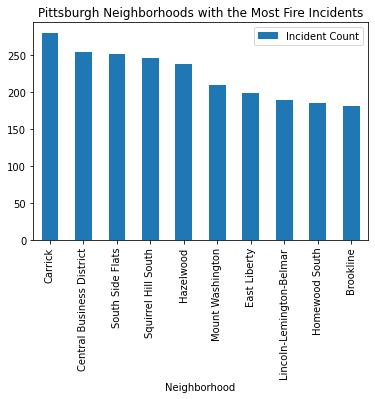

In [38]:
plot = high.iloc[:10].plot(kind = 'bar', x = "Neighborhood", y = "Incident Count", title = "Pittsburgh Neighborhoods with the Most Fire Incidents")

We can see that Carrick has the most amount of fire incidents, with Central Business District and South Side Flats not far behind.

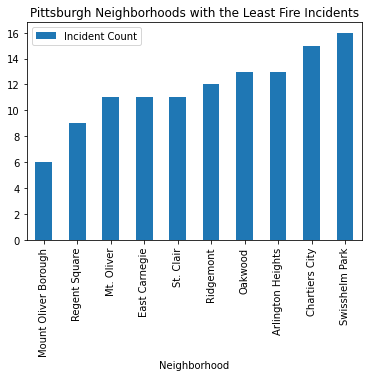

In [40]:
low = incidentCounter.sort_values("Incident Count", ascending = True)
plot = low.iloc[:10].plot(kind = 'bar', x = "Neighborhood", y = "Incident Count", title = "Pittsburgh Neighborhoods with the Least Fire Incidents")

Similar to the previous graph, this graph shows the amount of fire incidents, but differs as it shows the neighborhoods with the least amount. The neighborhood with the least amount is Mount Oliver Borough with 6.

Repeating the process of finding fire incidents, but this time we are focusing on the severity of the fire. Once again we create a new dataframe from the csv file and set the number of incidents to zero.

In [205]:
fireC = pd.DataFrame(columns = ["Neighborhood", "Number of Severe Fires(111)"])
fireC["Neighborhood"] = fireIncidents["neighborhood"]
fireC = fireIncidents[fireIncidents["incident_type"] == 111]

Now we can determine the neighborhood with the largest amount of severe fires

In [206]:
fireNumber = pd.DataFrame(columns = ["Neighborhood", "Number of Severe Fires(111)"])

for i, column in fireC.iterrows():
    neighborhood = column["neighborhood"]
    if neighborhood in fireNumber["Neighborhood"].values:
        fireNumber.loc[fireNumber["Neighborhood"] == neighborhood, "Number of Severe Fires(111)"]+=1 
    
    else:
        fire_row = pd.DataFrame({"Neighborhood": [neighborhood], "Number of Severe Fires(111)":[1]})
        fireNumber = pd.concat([fireNumber, fire_row])

In [207]:
sort_high = fireNumber.sort_values("Number of Severe Fires(111)", ascending = False)
sort_high.head(10)

,Neighborhood,Number of Severe Fires(111)
0,Carrick,80
0,Homewood North,59
0,Sheraden,58
0,Knoxville,57
0,Homewood South,49
0,Lincoln-Lemington-Belmar,48
0,Beltzhoover,45
0,Perry South,44
0,Mount Washington,43
0,Larimer,43


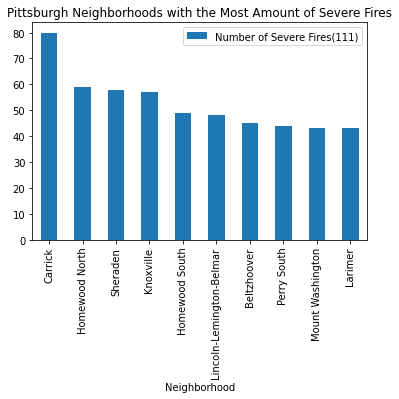

In [208]:
plt = sort_high.iloc[:10].plot(kind='bar', x= 'Neighborhood', y= 'Number of Severe Fires(111)',title= "Pittsburgh Neighborhoods with the Most Amount of Severe Fires")

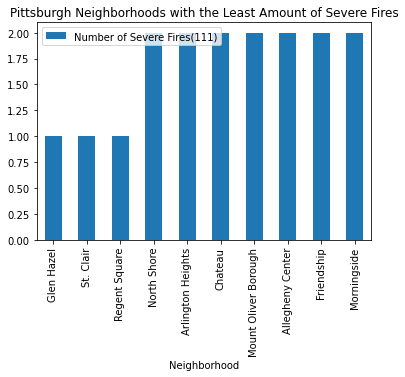

In [209]:
sort_low = fireNumber.sort_values("Number of Severe Fires(111)", ascending = True)
plt = sort_low.iloc[:10].plot(kind = 'bar',x = "Neighborhood", y = "Number of Severe Fires(111)", title = "Pittsburgh Neighborhoods with the Least Amount of Severe Fires")

Glancing at the bar graphs we can see that Glen Hazel has the least amount of severe fires, while Carrick has the greatest amount. If we look at the overall amount of fire incidents, Carrick is the neighborhood with the most incidents. This means that Carrick is the neighborhood most prone to having fire incidents and having severe fire incidents compared to the rest of the Pittsburgh neighborhoods. Glen Hazel is the neighborhood with the least amount of severe fires, however it not the neighborhood with the lowest amount of fire incidents, that would be Mount Oliver Borough. We can determine the overall safest neighborhood by searching for the incident count of Glen Hazel and the severe incident count of Mount Oliver Borough. Then we can compare the two to determine the safest neighborhood.

In [214]:
incidentCounter.query('Neighborhood.str.startswith("Glen Hazel")')

,Neighborhood,Incident Count
0,Glen Hazel,20


In [216]:
fireNumber.query('Neighborhood.str.startswith("Mount Oliver Borough")')

,Neighborhood,Number of Severe Fires(111)
0,Mount Oliver Borough,2


After a quick comparison, it can be stated that Mount Olvier Borough is the least flammable (safest) neighborhood in the Allegheny area with 2 severe fires incident and an overall incident count of 6. In comparison, Glen Hazel has 20 incident counts and only 1 severe fire incident.